Exercice 1 : Classification linéaire par SVM 

Nous allons d’abord utiliser les SVM sur la classification du fameux jeu de données iris. Sur ce 
jeu de données, nous allons utiliser les SVM linéaires (donc nous cherchons un perceptron à 
marge maximale).

In [18]:
# Imports
import numpy
from sklearn import datasets
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import tqdm
import pandas
import seaborn

In [3]:
iris = datasets.load_iris()
X = iris["data"][:,(2,3)] # petal leng th , petal width
y = (iris["target"] == 2 ).astype(numpy.float64) # Iris Virginica
svm_clf = Pipeline([("scaler",StandardScaler()),("linear_svc",LinearSVC(C=1, loss="hinge", random_state=42))])
svm_clf.fit(X,y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

Ici, c’est un SVM linéaire (LinearSVC) qui a été utilisé. On aurait pu également faire appel à la 
classe des SVC par un appel du type :SVC(kernel="linear", C=1). Mais ces SVM, d’usage plus 
général, puisqu’ils peuvent aussi réaliser des fonctions  de  décision  non  linéaires,  sont  aussi 
beaucoup plus gourmands en temps calcul, surtout avec de gros jeux de données. Une autre 
possibilité  est  d’utiliser  des  SGDClassifier,  avec  l’appel  SGDClassifier(loss="hinge", 
alpha=1/(m*C)).  Ces  SVM  sont  optimisés  par  une  descente  de  gradient  stochastique.  Ils  ne 
convergent pas aussi vite que linearSVC, mais peuvent traiter de très gros jeux de données qui 
ne tiennent pas dans la mémoire centrale, ou bien des données arrivant en flux.

1. Faites une validation croisée à 3 plis et calculez la performance moyenne. Calculez 
aussi la matrice de confusion.

In [9]:
score = cross_val_score(svm_clf, X, y, cv=3)
print(score)
print(numpy.mean(score))

[0.98 0.98 0.9 ]
0.9533333333333333


In [12]:
Y_pred = svm_clf.predict(X)
metrics.confusion_matrix(y, Y_pred)

array([[98,  2],
       [ 4, 46]], dtype=int64)

2. Refaites la même chose en posant C=100 et C=0.1. Qu’observez-vous ?

In [15]:
for i in [0.1, 100]:
    print(i)
    svm_clf = Pipeline([("scaler",StandardScaler()),("linear_svc",LinearSVC(C=i, loss="hinge", random_state=42))])
    svm_clf.fit(X,y)
    score = cross_val_score(svm_clf, X, y, cv=3)
    print(score)
    print(numpy.mean(score))
    Y_pred = svm_clf.predict(X)
    print(metrics.confusion_matrix(y, Y_pred))

0.1
[0.98 0.98 0.5 ]
0.82
[[97  3]
 [ 3 47]]
100
[0.98 0.98 0.92]
0.96
[[97  3]
 [ 3 47]]


c:\Users\arthu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\arthu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\arthu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\arthu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


On constate que plus C est important, plus le score augmente.

 19%|█▉        | 19/99 [00:00<00:01, 61.12it/s]c:\Users\arthu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\arthu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\arthu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\arthu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\arthu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to conve

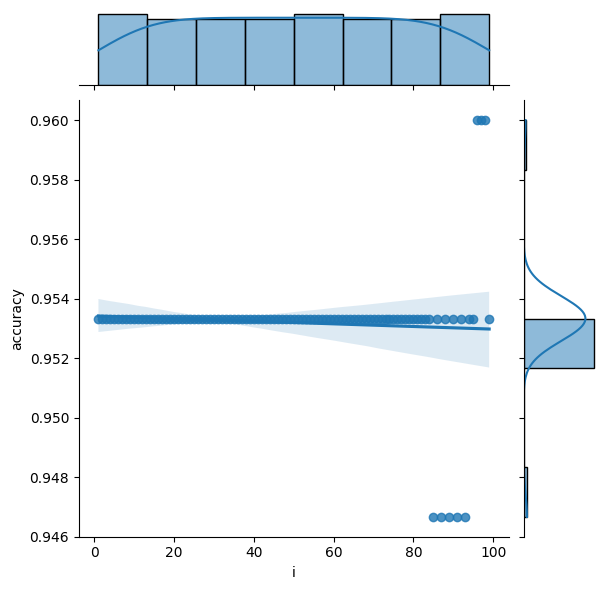

In [23]:
result = []
for i in tqdm.tqdm(range(1,100)):
    svm_clf = Pipeline([("scaler",StandardScaler()),("linear_svc",LinearSVC(C=i, loss="hinge", random_state=42))])
    svm_clf.fit(X,y)
    score = cross_val_score(svm_clf, X, y, cv=3)
    result.append([i,numpy.mean(score)])

result = pandas.DataFrame(result, columns=["i", "accuracy"])
seaborn.jointplot(x='i',y='accuracy',data=result,kind='reg')